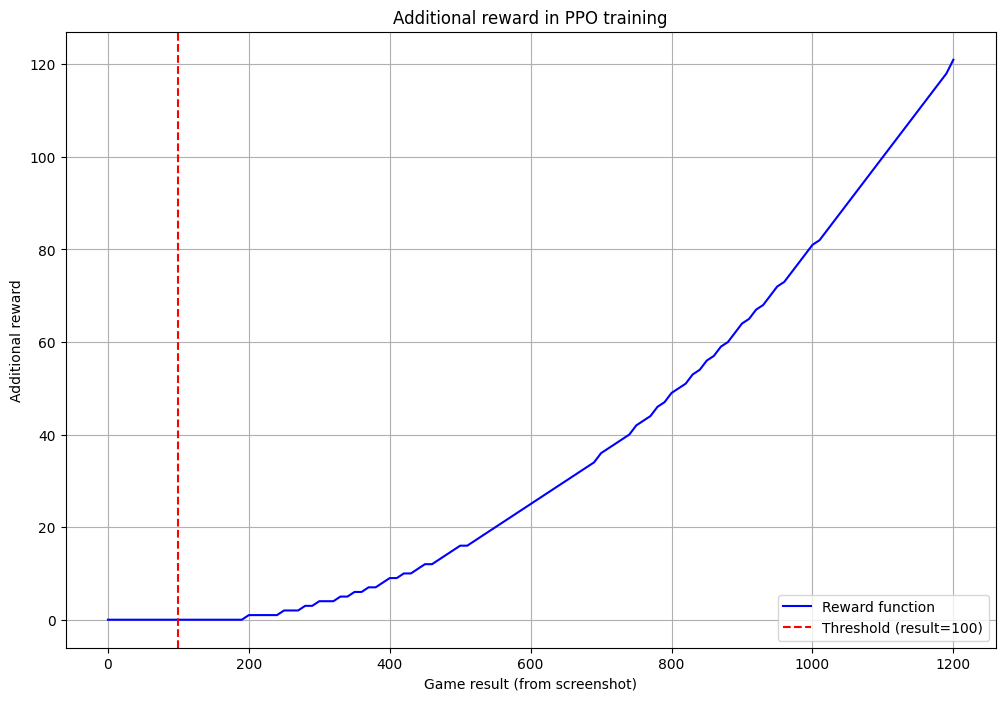

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def additional_reward_function(x):
    if x < 100:
        return 0
    else:
        return int(((x - 100) ** 2) / 10000)

x_values = np.arange(0, 1201, 10)
y_values = [additional_reward_function(x) for x in x_values]

plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, label="Reward function", color='b')
plt.xlabel("Game result (from screenshot)")
plt.ylabel("Additional reward")
plt.title("Additional reward in PPO training")
plt.axvline(100, color='r', linestyle='--', label="Threshold (result=100)")
plt.legend()
plt.grid(True)

plt.show()

In [24]:
import pandas as pd


df_v1 = pd.read_csv("evalutaion_v1.txt", names=['iterations', 'model', 'mean_reward', 'mean_score', 'max_score'], index_col=False)
df_v1

,iterations,model,mean_reward,mean_score,max_score
0,50,models/PPO/55000,26.918367,91.224490,204
1,50,models/PPO/56000,28.163265,93.326531,209
2,50,models/PPO/57000,24.020408,81.897959,226


In [25]:
df_v3 = pd.read_csv("evalutaion_v3.txt", names=['iterations', 'model', 'mean_reward', 'mean_score', 'max_score'], index_col=False)
df_v3

,iterations,model,mean_reward,mean_score,max_score
0,50,models/PPOv3/49000,34.020408,99.632653,236
1,50,models/PPOv3/50000,42.877551,124.857143,363
2,50,models/PPOv3/51000,35.530612,103.428571,216


In [36]:
labels = ['random choice', 'model v1', 'model v3', 'human player']
mean_rewards = [15.65, df_v1['mean_reward'].max(), df_v3['mean_reward'].max()]
mean_scores = [52.55, df_v1['mean_score'].max(), df_v3['mean_score'].max(), 700]
max_scores = [129, df_v1['max_score'].max(), df_v3['max_score'].max(), 1616] 

In [48]:
import matplotlib.pyplot as plt

def plot_bars(values, labels, title, y_name):
    plt.figure(figsize=(8, 8))
    bars = plt.bar(labels, values, color='skyblue')
    
    for bar in bars:
        yval = bar.get_height()
        if yval < 1000:
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
    
    plt.ylabel(y_name)
    plt.title(title)
    plt.ylim(0, max(values) + 5) 
    
    plt.show()


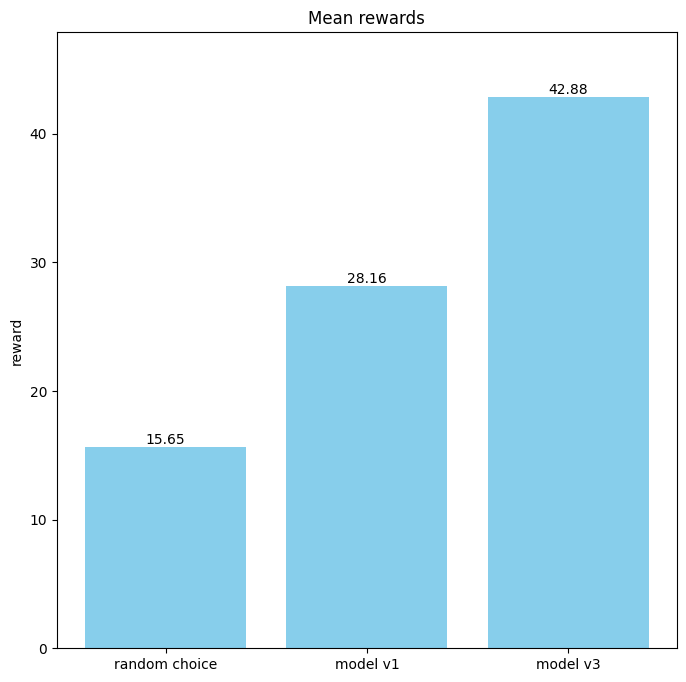

In [44]:
mean_rewards
plot_bars(mean_rewards, labels[:3], "Mean rewards", "reward")

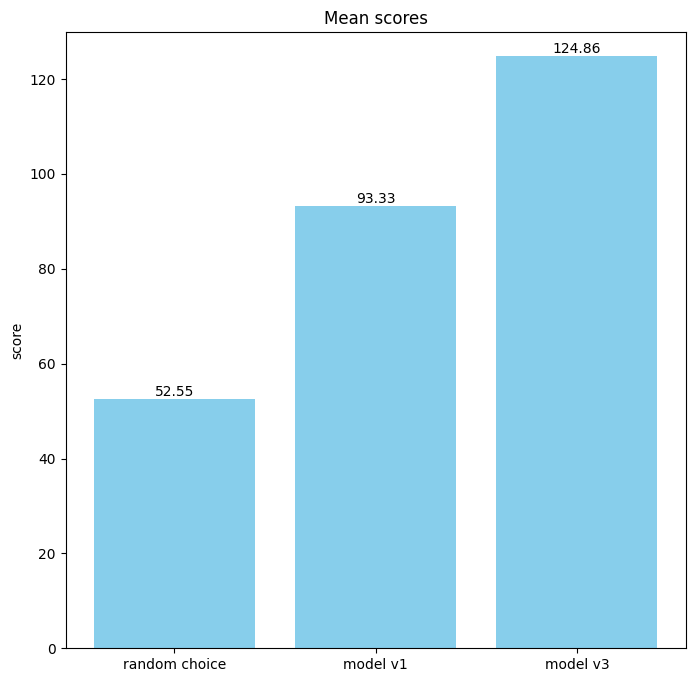

In [47]:
mean_scores
plot_bars(mean_scores[:3], labels[:3], "Mean scores", "score")

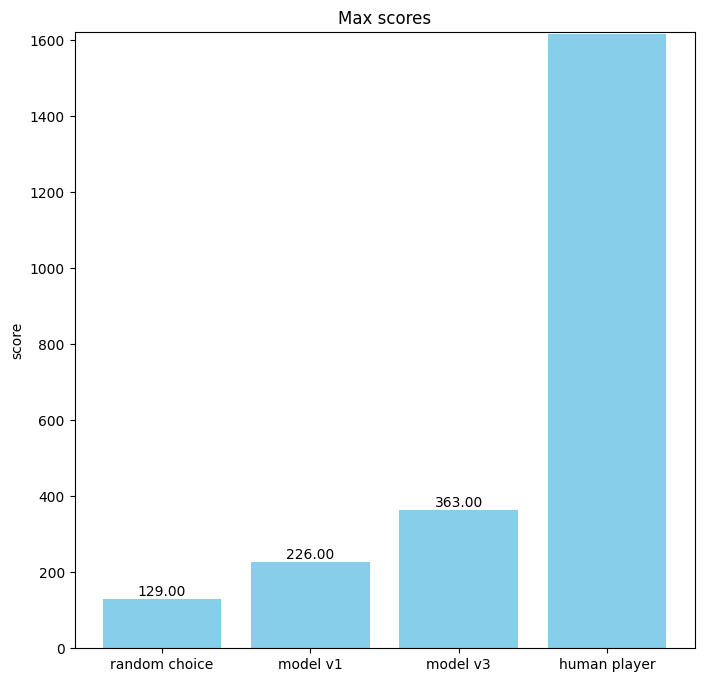

In [49]:
max_scores
plot_bars(max_scores, labels, "Max scores", "score")